## Chi-Squared Analysis

### First Question: Did more woman and children survive compared to man

Dataset from Canvas (Titanic passenger list.csv)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")
df_titanic

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
...,...,...,...,...,...,...,...,...,...
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.50
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.50
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN


- What kind of data the the `dependent` variable?

- What kind of data is the `gender` (indep. variable)?
    - Nominal

Two types
- `Ordinal` data. Data that can be ordered.
- `Categorical/nominal`. Data that can not be ordered.

In [12]:
contingency_table = pd.crosstab(df_titanic['Gender'], df_titanic['Lived_Died'], margins=True)
contingency_table

Lived_Died,died,lived,All
Gender,,,
Female,143,339,482
Male,709,161,870
All,852,500,1352


<Axes: title={'center': 'Number of passengers that lived or died by gender'}, xlabel='Gender', ylabel='Count'>

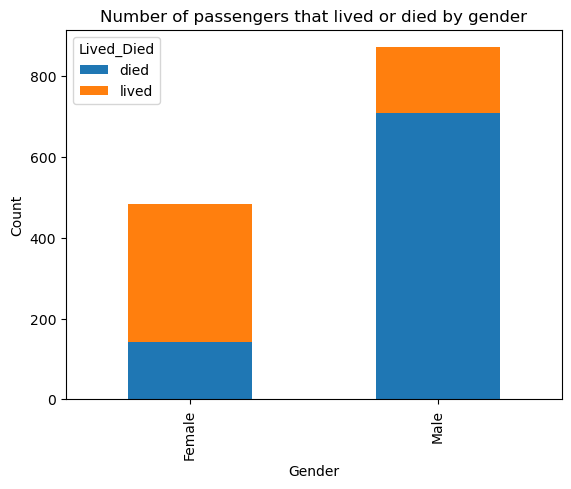

In [18]:
# Task: Create a stacked bar chart showing the number of passengers by gender that lived or died

# Exclude the last column and row (summary info)
contingency_table = contingency_table.iloc[:-1, :-1]
contingency_table.plot(kind='bar', stacked=True, title='Number of passengers that lived or died by gender', ylabel='Count')

In [19]:
# Alternative way to get the data
df_titanic.groupby('Gender')['Lived_Died'].value_counts()

Gender  Lived_Died
Female  lived         339
        died          143
Male    died          709
        lived         161
Name: count, dtype: int64

In [20]:
from scipy import stats # For chi2
print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1) Chi-Squared: The higher the Chi-Squared statistics, the less likelihood that the observed values were the result of pure chance
# 2) Target P-Value
# 3) Degrees of freedom: 1 degree of freedom. (2 rows -1) * (2 columns - 1) = 1

# --> Gives us more confidence that not by chance more males than females died but instead that there is a relationship

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square Example: Was Age relevant?

In [26]:
# Check the age column. It is already fixed for the age at the time of the incident

# What about null values?

# Create the bins
df_titanic['Age_Bin'] = pd.cut(df_titanic['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
contingency_table = pd.crosstab(df_titanic['Age_Bin'], df_titanic['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died  died  lived
Age_Bin                
0-10          46     54
11-20        156     71
21-30        286    166
31-40        158    107
41-50        111     64
51-60         40     30
61-70         27      7
71-80          5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


<Axes: title={'center': 'Number of passengers that lived or died by age group'}, xlabel='Age_Bin', ylabel='Count'>

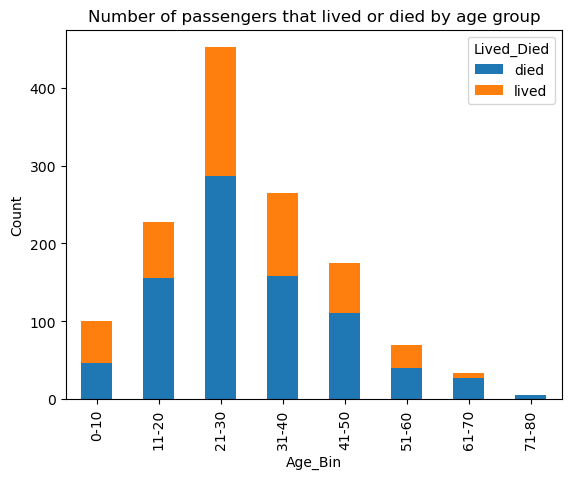

In [33]:
# Create a histogram
contingency_table.plot(kind='bar', stacked=True, title='Number of passengers that lived or died by age group', ylabel='Count')

In [37]:
# Alternative way
df_titanic.groupby('Age_Bin')['Lived_Died'].value_counts()

C:\Users\carst\AppData\Local\Temp\ipykernel_10140\1320496476.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic.groupby('Age_Bin')['Lived_Died'].value_counts()


Age_Bin  Lived_Died
0-10     lived          54
         died           46
11-20    died          156
         lived          71
21-30    died          286
         lived         166
31-40    died          158
         lived         107
41-50    died          111
         lived          64
51-60    died           40
         lived          30
61-70    died           27
         lived           7
71-80    died            5
         lived           0
Name: count, dtype: int64